In [1]:
%matplotlib inline
import sys
import os

from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.path.join(sys.path[0], '..'))
import kernels
from regressor import GaussianProcessRegressor
from plotting import kill_ticks

In [2]:
np.random.seed(0)
plt.rcParams.update({'figure.figsize': (20, 10), 'font.size': 16})
rc('font', **{'family': 'serif'})
rc('text', usetex=True)

# Kernel Cookbook
<hr/>
A demonstration of priors and posteriors of some kernels for GP regression using an implementation of GP regression provided in `regressor.py`. I did this to see how different kernels respond to data. Inspired by David Duvenaud's Kernel Cookbook at http://www.cs.toronto.edu/~duvenaud/cookbook/. (If you're interested in Gaussian Processes, it is worth looking at his PhD thesis and the book Gaussian Processes for Machine Learning.)

In [3]:
def sampling_plot(gp):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    gp.plot.prior(x=grid, ax=ax1)
    gp.plot.posterior(x=grid, size=5, ax=ax2);
    kill_ticks(ax1)
    kill_ticks(ax2)
    return None

In [4]:
# generate some training data
grid = np.linspace(-3, 3, 1000).reshape(-1, 1).astype(np.float64)
train_x = np.array([-2, -0.5, 2]).reshape(-1, 1).astype(np.float64)
train_y = np.array([1.4, -0.8, 0.8]).reshape(-1, 1).astype(np.float64)
# y-values observed with noise of this amplitude
noise_level = 0.01

### Radial Basis Function

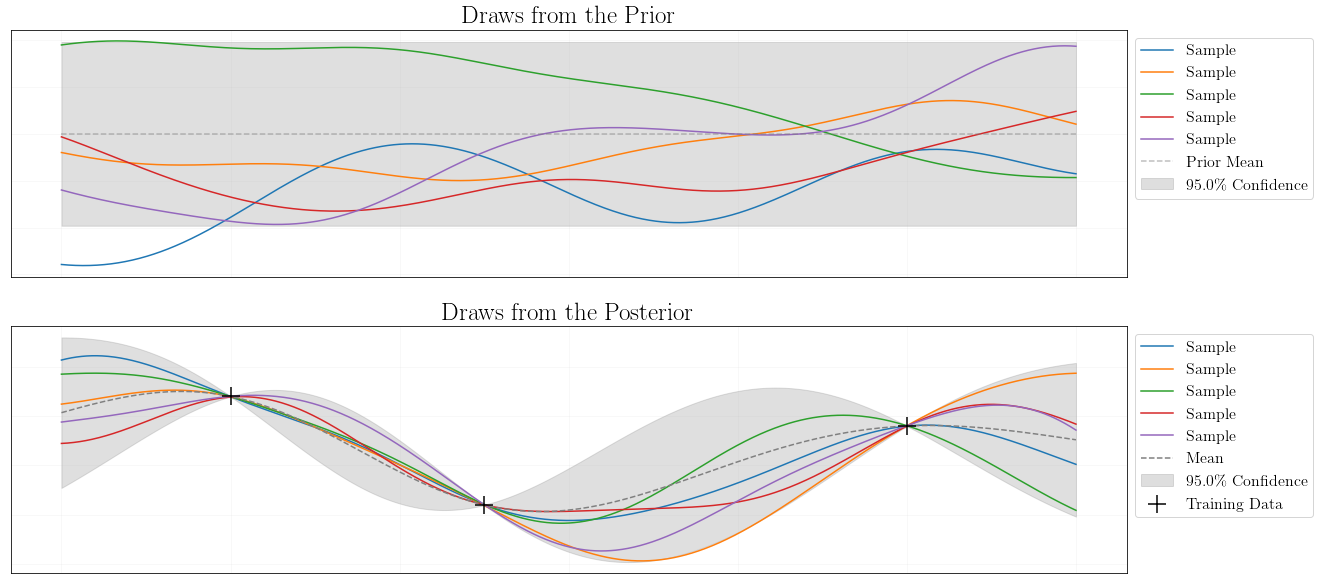

In [5]:
gp = GaussianProcessRegressor(kernel=kernels.RadialBasisFunction(length_scale=1.))
gp.fit(train_x, train_y, noise_level=noise_level)
sampling_plot(gp)

### Ornstein-Uhlenbeck

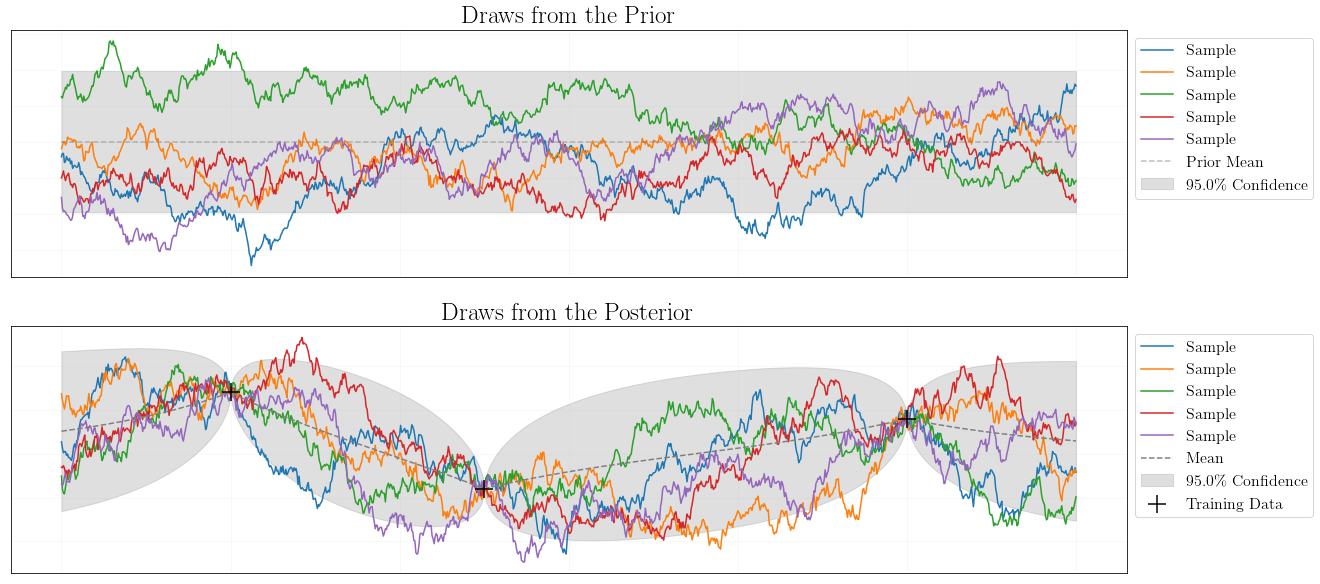

In [6]:
gp = GaussianProcessRegressor(kernel=kernels.OrnsteinUhlenbeck(length_scale=1.))
gp.fit(train_x, train_y, noise_level=noise_level)
sampling_plot(gp)

### Rational Quadratic

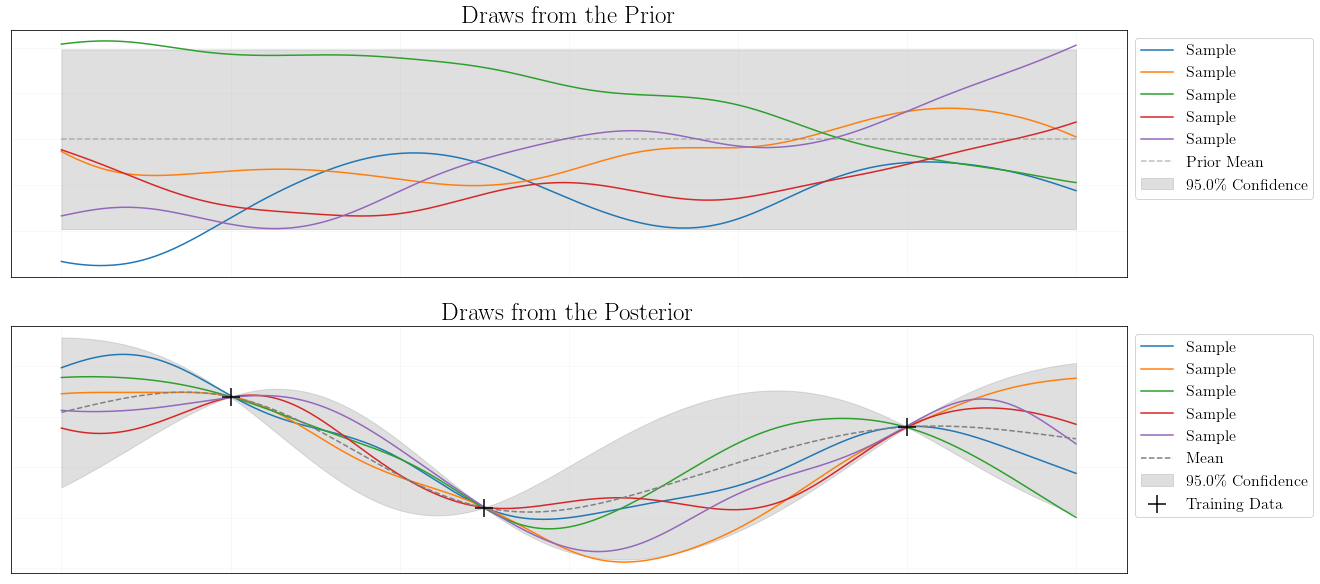

In [7]:
gp = GaussianProcessRegressor(kernel=kernels.RationalQuadratic(alpha=2.))
gp.fit(train_x, train_y, noise_level=noise_level)
sampling_plot(gp)

### Periodic

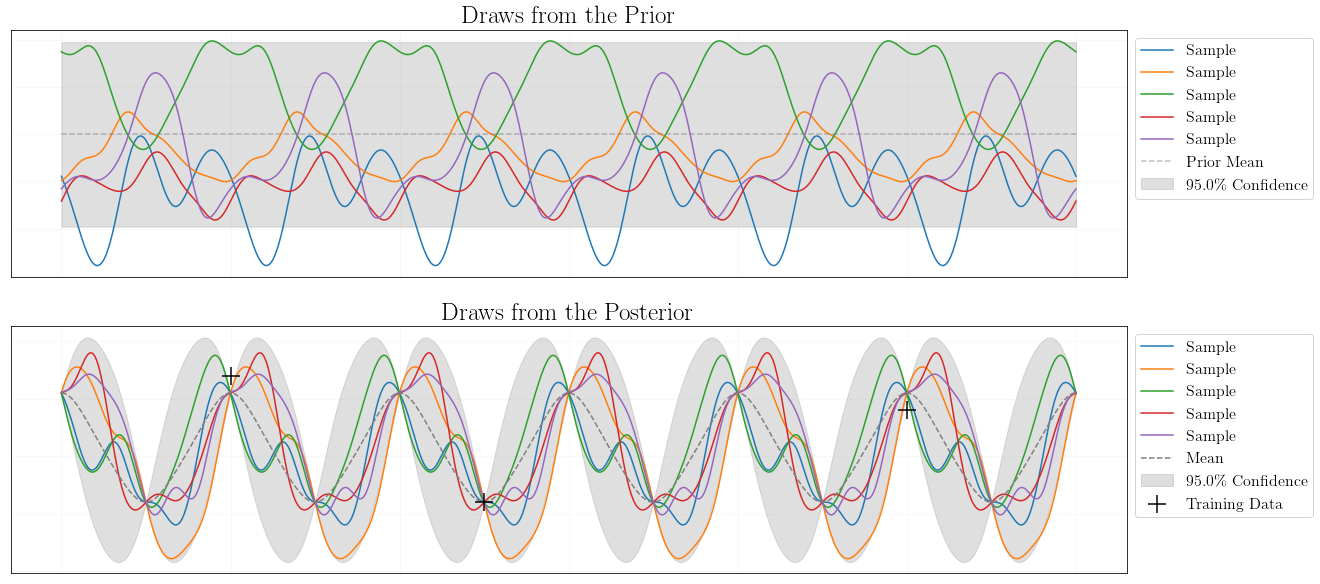

In [8]:
gp = GaussianProcessRegressor(kernel=kernels.Periodic(length_scale=1., periodicity=1.))
gp.fit(train_x, train_y, noise_level=noise_level)
sampling_plot(gp)

### Constant

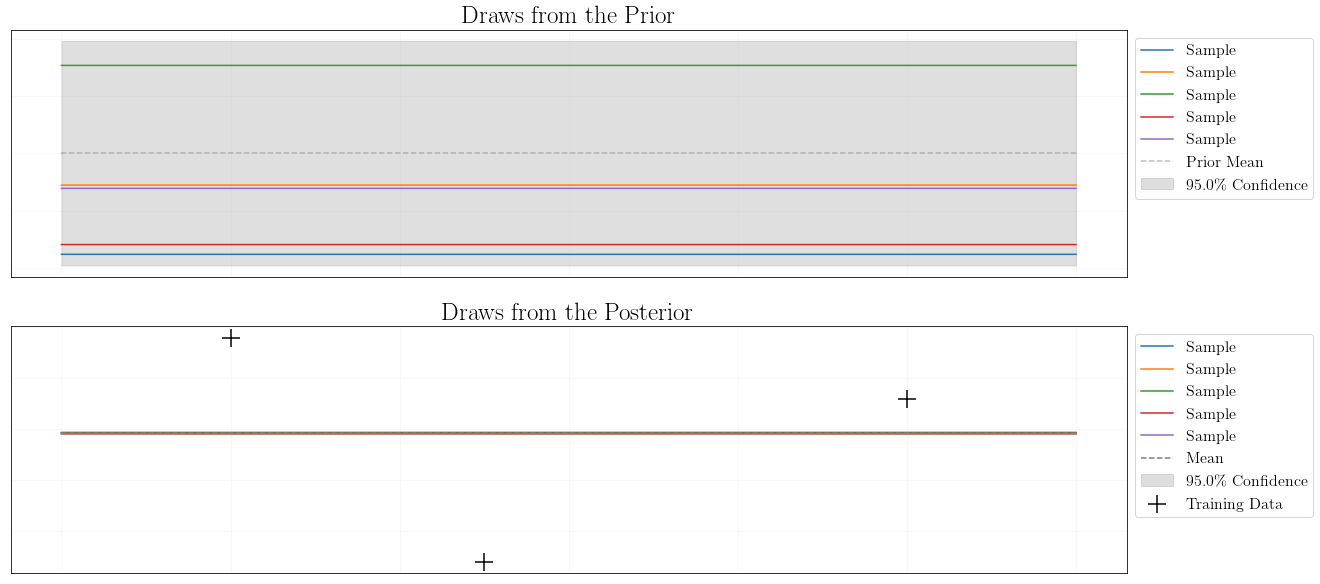

In [9]:
gp = GaussianProcessRegressor(kernel=kernels.Constant(sigma=1.))
gp.fit(train_x, train_y, noise_level=noise_level)
sampling_plot(gp)

### White Noise

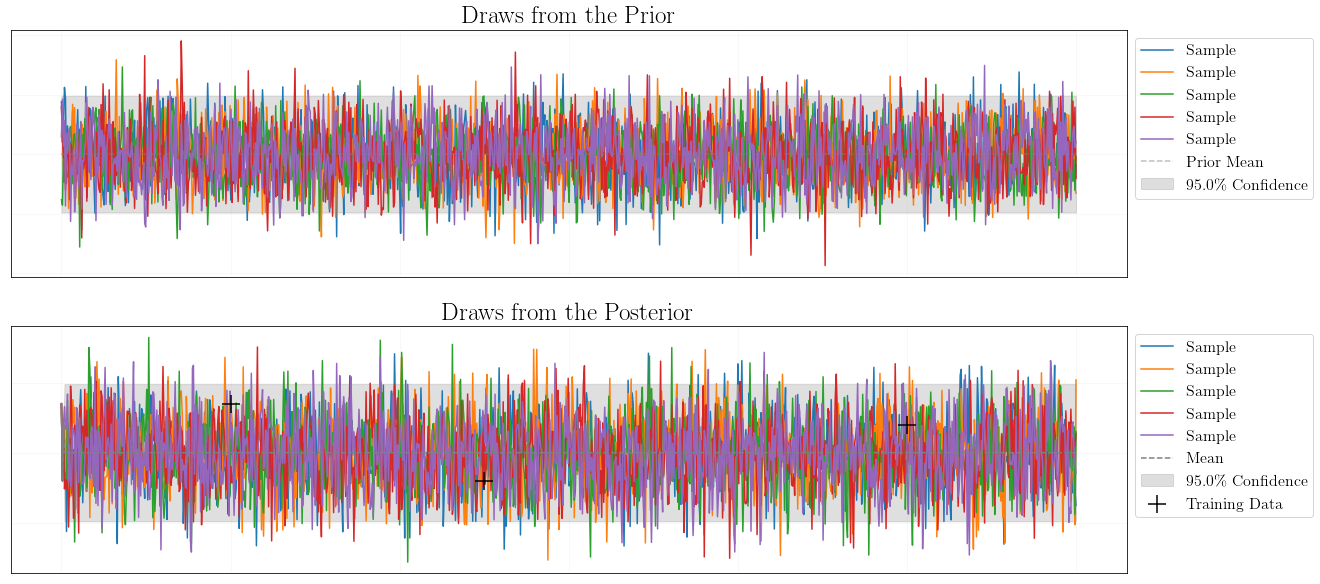

In [10]:
gp = GaussianProcessRegressor(kernel=kernels.WhiteNoise(sigma=1.))
gp.fit(train_x, train_y, noise_level=noise_level)
sampling_plot(gp)